# This example is just to show the Multilabel clafficatoin with neural networks in Tensoflow 

 **So, I didn't given importance for accuracy**

**Importing required libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,classification,accuracy_score
from sklearn.preprocessing import MinMaxScaler
import os,glob
import math
%matplotlib inline

E:\progammefiles\python\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**Data Preprocessing**

In [2]:
ex_df=pd.read_csv('E:/Machine_learning/DataSets/emg-4/0.csv',header=None)

In [3]:
ex_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


**The sources files contains into fours files like *.CSV, and in the file doesn't contain any columns names and class, so we taken column names like below**

In [4]:
cols=['col'+str(i+1) for i in range(64)]
cols.append('class')

In [5]:
all_files=glob.glob(os.path.join('E:/Machine_learning/DataSets/emg-4/*.csv'))

In [6]:
j=0
np_array=[]
for i in all_files:
    df=pd.read_csv(i,header=None,index_col=None)
    np_array.append(df.as_matrix())

df=pd.DataFrame(np.vstack(np_array),columns=cols)

In [7]:
df.shape

(11678, 65)

In [8]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col56,col57,col58,col59,col60,col61,col62,col63,col64,class
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0.0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0.0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0.0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0.0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0.0


In [9]:
df['class'].unique()

array([0., 1., 2., 3.])

**being classfication problem, So class column divided into four columns**

In [10]:
df=pd.concat([df.drop(['class'],axis=1),
              pd.DataFrame(np.array(pd.get_dummies(df['class'])),columns=['class1','class2','class3','class4'])],axis=1)

In [11]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col59,col60,col61,col62,col63,col64,class1,class2,class3,class4
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,8.0,5.0,4.0,-7.0,-59.0,16.0,1,0,0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,6.0,5.0,13.0,21.0,111.0,15.0,1,0,0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,1.0,-8.0,7.0,21.0,114.0,48.0,1,0,0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,7.0,11.0,33.0,39.0,119.0,43.0,1,0,0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,2.0,6.0,-13.0,-24.0,-112.0,-69.0,1,0,0,0


In [12]:
X=df.drop(['class1','class2','class3','class4'],axis=1)
X.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0


In [13]:
y=df[['class1','class2','class3','class4']]
y.head()

,class1,class2,class3,class4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [14]:
X.shape

(11678, 64)

In [15]:
y=y.astype(float)
y.shape

(11678, 4)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.1, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)
#X_train=pd.DataFrame(X_train,columns=X.columns)
#X_test=pd.DataFrame(X_test,columns=X.columns)
#y_train=pd.DataFrame(y_train,columns=y.columns)
#y_test=pd.DataFrame(y_test,columns=y.columns)

In [17]:
X_train.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64
4684,-17.0,-4.0,1.0,1.0,-8.0,-35.0,-1.0,1.0,-1.0,0.0,...,2.0,1.0,3.0,1.0,2.0,2.0,-11.0,-28.0,-1.0,-1.0
960,5.0,-4.0,6.0,12.0,4.0,0.0,-57.0,-11.0,-7.0,9.0,...,99.0,60.0,1.0,5.0,14.0,7.0,14.0,15.0,-53.0,41.0
2009,14.0,0.0,-5.0,-8.0,-12.0,-27.0,-65.0,-18.0,11.0,-12.0,...,-16.0,-11.0,10.0,-21.0,5.0,13.0,-3.0,-7.0,25.0,7.0
1579,-20.0,-9.0,-3.0,-14.0,-7.0,-2.0,-56.0,-3.0,-8.0,17.0,...,-50.0,-8.0,-4.0,-4.0,0.0,17.0,-22.0,-38.0,-94.0,-17.0
883,16.0,10.0,-3.0,-14.0,-13.0,-3.0,56.0,-2.0,12.0,0.0,...,97.0,2.0,10.0,3.0,-3.0,-8.0,-21.0,24.0,10.0,9.0


In [18]:
minMaxScaler=MinMaxScaler()

In [19]:
minMaxScaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
X_train=minMaxScaler.transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64
0,0.436123,0.515464,0.507463,0.598425,0.530516,0.349398,0.498039,0.507874,0.459916,0.547009,...,0.509804,0.533058,0.489712,0.545852,0.640000,0.591667,0.421053,0.392157,0.498039,0.490040
1,0.533040,0.515464,0.582090,0.685039,0.586854,0.489960,0.278431,0.460630,0.434599,0.585470,...,0.890196,0.776860,0.481481,0.563319,0.800000,0.633333,0.540670,0.560784,0.294118,0.657371
2,0.572687,0.536082,0.417910,0.527559,0.511737,0.381526,0.247059,0.433071,0.510549,0.495726,...,0.439216,0.483471,0.518519,0.449782,0.680000,0.683333,0.459330,0.474510,0.600000,0.521912
3,0.422907,0.489691,0.447761,0.480315,0.535211,0.481928,0.282353,0.492126,0.430380,0.619658,...,0.305882,0.495868,0.460905,0.524017,0.613333,0.716667,0.368421,0.352941,0.133333,0.426295
4,0.581498,0.587629,0.447761,0.480315,0.507042,0.477912,0.721569,0.496063,0.514768,0.547009,...,0.882353,0.537190,0.518519,0.554585,0.573333,0.508333,0.373206,0.596078,0.541176,0.529880


In [21]:
X_test=minMaxScaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [22]:
X_train.shape

(10510, 64)

In [23]:
y_train.head()

,class1,class2,class3,class4
4684,0.0,1.0,0.0,0.0
960,1.0,0.0,0.0,0.0
2009,1.0,0.0,0.0,0.0
1579,1.0,0.0,0.0,0.0
883,1.0,0.0,0.0,0.0


In [24]:
X_train[9340:9342].shape

(2, 64)

In [25]:
X_train[9341:9342].shape

(1, 64)

In [26]:
X_train[800:802].shape

(2, 64)

In [27]:
len(X_train)

10510

** Creating Batch for data **

In [28]:
class batch_data:
    
    Previous_size=0
    
    def __init__(self,X_input,y_input):
        self.X=X_input
        self.y=y_input
    
    def next_batch(self,size):
        #Previous_size=Previous_size+self.size
        start_loc=self.Previous_size
        end_loc=self.Previous_size+size
        self.Previous_size=end_loc
        if len(self.X)<end_loc:
            self.Previous_size=0
            return self.X[len(self.X)-size:len(self.X)],self.y[len(self.X)-size:len(self.X)]
        if len(self.X)==end_loc:
            self.Previous_size=0
        return self.X[start_loc:end_loc],self.y[start_loc:end_loc]
    

In [29]:
train_batch_data=batch_data(X_train,y_train) 
test_batch_data=batch_data(X_test,y_test)

# Neural networks

**Place holders for input Tensor and output Tensor**

In [30]:
X_true=tf.placeholder(tf.float32,shape=[None,64])
y_true=tf.placeholder(tf.float32,shape=[None,4])

In [31]:
learning_rate=0.001
batch_size=32
epochs=100

**weights and biases**

In [32]:
def create_wt_bi(shape):
    return tf.Variable(tf.ones(shape))

In [33]:
w1=create_wt_bi([64,32])
b1=create_wt_bi([32])

In [34]:
w2=create_wt_bi([32,16])
b2=create_wt_bi([16])

In [35]:
wo=create_wt_bi([16,4])
bo=create_wt_bi([4])

**Creating Graph for Neural Network**

In [36]:
hidden_layer1=tf.add(tf.matmul(X_true,w1),b1)

In [37]:
hidden_layer2=tf.matmul(hidden_layer1,w2)+b2

In [38]:
y_out=tf.add(tf.matmul(hidden_layer2,wo),bo)

In [39]:
entropy=tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_out)
#entropy=tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_out)

In [40]:
loss=tf.reduce_mean(entropy)

**Optimizer**

In [41]:
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)

In [42]:
train=optimizer.minimize(loss)
saver=tf.train.Saver(max_to_keep=epochs)

In [43]:
def training (sess,train,y_out,X_train,y_train,batch_size=32,X_test=None,y_test=None,epochs=1):
    
    #Creating object batch data
    train_batch_data=batch_data(X_train,y_train)
    test_batch_data=batch_data(X_test,y_test)
    
    #Cal for steps for each epcoh
    steps_for_epoch=math.ceil(len(X_train)/batch_size)
    
    test_scores=[]
    train_scores=[]
    loss_value=[]
    
    for i in range(0,epochs):
        j=0
        while(True):
            
            #Getting X_train,y_train data
            X_feed,y_feed=train_batch_data.next_batch(batch_size)
            
            #Training model
            _,loss_tr=sess.run([train,loss],feed_dict={X_true:X_feed,y_true:y_feed})
            
            j=j+1
            
            #Checking epochs is completed or not
            if j>=steps_for_epoch:
                
                print(i+1, 'epochs is completed')
                print('Loss:',loss_tr)
                loss_value.append(loss_tr)
                
                #Training Predictions
                train_op=sess.run(tf.argmax(y_out,1),feed_dict={X_true:X_train})
                
                #Training Accuracy
                train_acc_score=accuracy_score(np.argmax(np.array(y_train),axis=1),train_op)
                print('Accuracy score:',accuracy_score(np.argmax(np.array(y_train),axis=1),train_op))
                
                #if X_test!=None:
                
                #Testing Predicions
                test_op=sess.run(tf.arg_max(y_out,1),feed_dict={X_true:X_test})
                
                #Testing accuracy
                test_acc_score=accuracy_score(np.argmax(np.array(y_test),axis=1),test_op)
                print('Test Accuracy Score: ',accuracy_score(np.argmax(np.array(y_test),axis=1),test_op))
                
                train_scores.append(train_acc_score)
                test_scores.append(test_acc_score)
                
                #Saving checkpoints for each epoch
                checpoint='E:/Machine_learning/savingModel/tensorflowcheckpioints/classfication_'+str(int(i+1))+'epcohs.ckpt'
                saver.save(sess,checpoint)
                #print(i)
                break
    
    return train_scores,test_scores,loss_value
                #return train_acc_score,None
        

**Training model**

In [44]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    acc_train,acc_test,loss_value=training(sess,train,y_out,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test\
                             ,epochs=epochs,batch_size=batch_size)

1 epochs is completed
Loss: 1.4026544
Accuracy score: 0.2477640342530923
Instructions for updating:
Use `argmax` instead
Test Accuracy Score:  0.2559931506849315
2 epochs is completed
Loss: 1.5964997
Accuracy score: 0.24966698382492863
Test Accuracy Score:  0.24486301369863014
3 epochs is completed
Loss: 1.3995006
Accuracy score: 0.2499524262607041
Test Accuracy Score:  0.2525684931506849
4 epochs is completed
Loss: 1.5170434
Accuracy score: 0.252616555661275
Test Accuracy Score:  0.2465753424657534
5 epochs is completed
Loss: 1.3965294
Accuracy score: 0.252616555661275
Test Accuracy Score:  0.2465753424657534
6 epochs is completed
Loss: 1.4114951
Accuracy score: 0.252616555661275
Test Accuracy Score:  0.2465753424657534
7 epochs is completed
Loss: 1.3951905
Accuracy score: 0.252616555661275
Test Accuracy Score:  0.2465753424657534
8 epochs is completed
Loss: 1.3854494
Accuracy score: 0.252616555661275
Test Accuracy Score:  0.2465753424657534
9 epochs is completed
Loss: 1.384216
Accura

71 epochs is completed
Loss: 1.3725765
Accuracy score: 0.315604186489058
Test Accuracy Score:  0.2988013698630137
72 epochs is completed
Loss: 1.3729355
Accuracy score: 0.3160799238820171
Test Accuracy Score:  0.2979452054794521
73 epochs is completed
Loss: 1.373278
Accuracy score: 0.3160799238820171
Test Accuracy Score:  0.2979452054794521
74 epochs is completed
Loss: 1.3736048
Accuracy score: 0.31617507136060896
Test Accuracy Score:  0.2988013698630137
75 epochs is completed
Loss: 1.3739171
Accuracy score: 0.3154138915318744
Test Accuracy Score:  0.2996575342465753
76 epochs is completed
Loss: 1.3742158
Accuracy score: 0.31550903901046623
Test Accuracy Score:  0.2988013698630137
77 epochs is completed
Loss: 1.3745017
Accuracy score: 0.3156993339676499
Test Accuracy Score:  0.2996575342465753
78 epochs is completed
Loss: 1.3747753
Accuracy score: 0.31588962892483347
Test Accuracy Score:  0.2988013698630137
79 epochs is completed
Loss: 1.3750379
Accuracy score: 0.3160799238820171
Test 

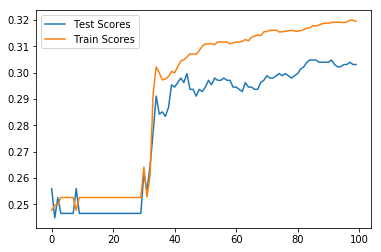

In [45]:
plt.plot(acc_test,label='Test Scores')
plt.plot(acc_train,label='Train Scores')
plt.legend(loc="best")

** MOdel Performace is not at all good, have to try this with dimensions reductions **

**Predictions on trained model**

In [47]:
#Predictions
with tf.Session() as sess:
    saver.restore(sess, "E:/Machine_learning/savingModel/tensorflowcheckpioints/classfication_100epcohs.ckpt")
    test_batch_data=batch_data(X_test,y_test)
    print(sess.run(tf.arg_max(y_out,dimension=1),feed_dict={X_true:X_test}))

INFO:tensorflow:Restoring parameters from E:/Machine_learning/savingModel/tensorflowcheckpioints/classfication_100epcohs.ckpt
[2 2 3 ... 2 2 2]
